In [0]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the data for 2015, 2016 and 2017

In [0]:
df_18 = pd.read_csv(r"C:\Users\Arvind\Downloads\2018.csv")
df_19 = pd.read_csv(r"C:\Users\Arvind\Downloads\2019.csv")

In [0]:
#columns name change
df_18.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in df_18.columns]
df_19.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in df_19.columns]
df_18.columns=[each.replace("."," ") for each in df_18.columns]
df_19.columns=[each.replace("."," ") for each in df_19.columns]

## Happiness Data Analysis for year 2018

#### Data Cleaning

In [0]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
Overall_rank       156 non-null int64
Country            156 non-null object
Region             150 non-null object
Happiness_Score    156 non-null float64
GDP                156 non-null float64
Social_support     156 non-null float64
Healthy            156 non-null float64
Freedom            156 non-null float64
Generosity         156 non-null float64
Perceptions        155 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 12.3+ KB


In [0]:
print("Are There Missing Data? :",df_18.isnull().any().any())
print(df_18.isnull().sum())

Are There Missing Data? : True
Overall_rank       0
Country            0
Region             6
Happiness_Score    0
GDP                0
Social_support     0
Healthy            0
Freedom            0
Generosity         0
Perceptions        1
dtype: int64


#### Correlation between the different attributes of year 2018

In [0]:
df_18.corr()

,Overall_rank,Happiness_Score,GDP,Social_support,Healthy,Freedom,Generosity,Perceptions
Overall_rank,1.000000,-0.991749,-0.805897,-0.737500,-0.778700,-0.530786,-0.103602,-0.371133
Happiness_Score,-0.991749,1.000000,0.802124,0.745760,0.775814,0.544280,0.135825,0.405292
GDP,-0.805897,0.802124,1.000000,0.672080,0.844273,0.332275,-0.011241,0.319582
Social_support,-0.737500,0.745760,0.672080,1.000000,0.667288,0.411087,0.018226,0.218364
Healthy,-0.778700,0.775814,0.844273,0.667288,1.000000,0.355475,0.020751,0.315569
Freedom,-0.530786,0.544280,0.332275,0.411087,0.355475,1.000000,0.297988,0.462446
Generosity,-0.103602,0.135825,-0.011241,0.018226,0.020751,0.297988,1.000000,0.362249
Perceptions,-0.371133,0.405292,0.319582,0.218364,0.315569,0.462446,0.362249,1.000000


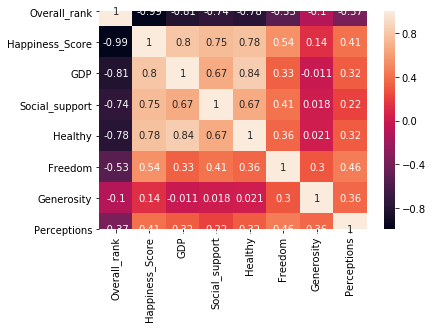

In [0]:
corrMatrix = df_18.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

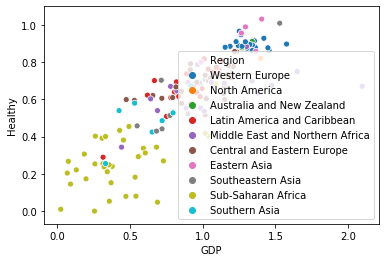

In [0]:
sns.scatterplot(x="GDP", y="Healthy", hue = 'Region', data=df_18)

count    156.000000
mean       5.375917
std        1.119506
min        2.905000
25%        4.453750
50%        5.378000
75%        6.168500
max        7.632000
Name: Happiness_Score, dtype: float64


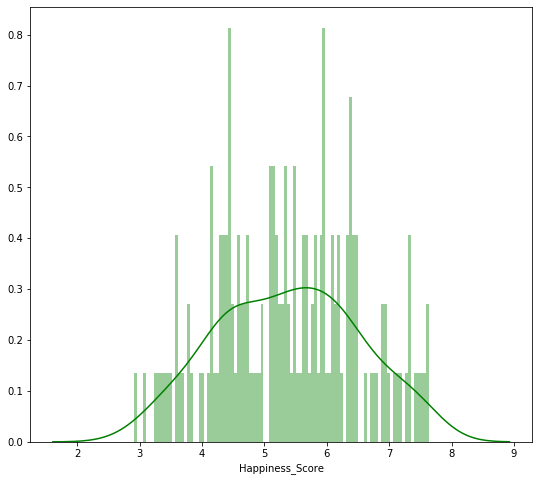

In [0]:
print(df_18['Happiness_Score'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_18['Happiness_Score'], color='g', bins=100, hist_kws={'alpha': 0.4});

Distplot shows that Happiness score is normally distributed for 2015 with a mean score of 5.375 and a standard deviation of 1.12

In [0]:
df_num1 = df_18.select_dtypes(include = ['float64', 'int64'])
df_num1.head()

,Overall_rank,Happiness_Score,GDP,Social_support,Healthy,Freedom,Generosity,Perceptions
0,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357


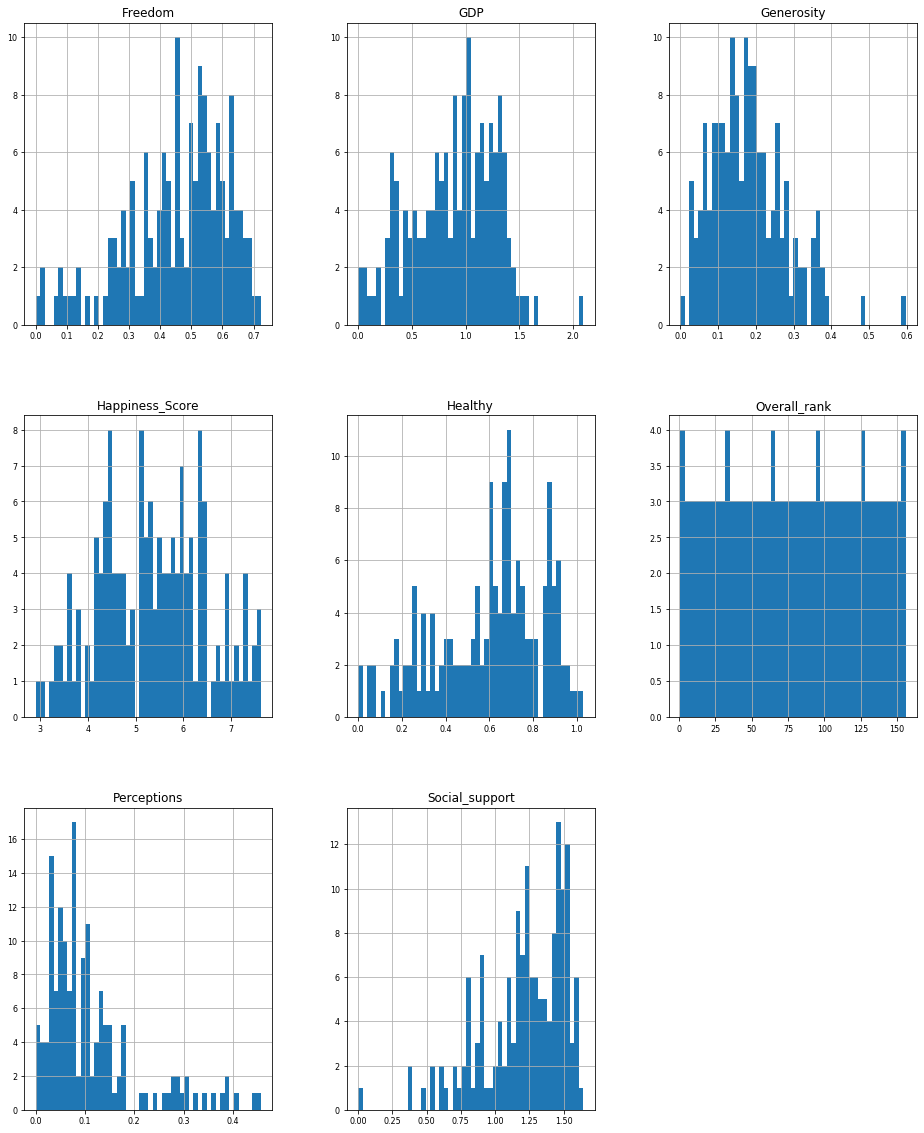

In [0]:
df_num1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

#### Correlation of different attributes with Happiness rank for 2018

In [0]:
df_num1_corr = df_num1.corr()['Overall_rank'][:-1] 
golden_features_list = df_num1_corr[abs(df_num1_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Happiness rank:\n{}".format(len(golden_features_list), golden_features_list))

There is 6 strongly correlated values with Happiness rank:
Overall_rank       1.000000
Freedom           -0.530786
Social_support    -0.737500
Healthy           -0.778700
GDP               -0.805897
Happiness_Score   -0.991749
Name: Overall_rank, dtype: float64


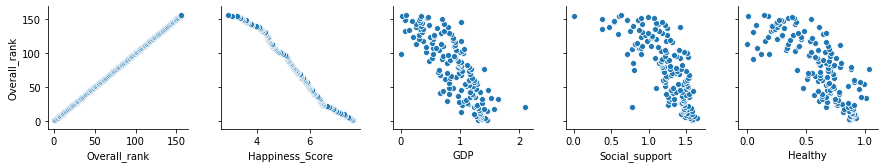

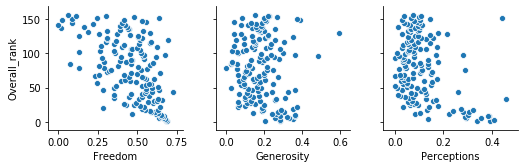

In [0]:
for i in range(0, len(df_num1.columns), 5):
    sns.pairplot(data=df_num1,
                x_vars=df_num1.columns[i:i+5],
                y_vars=['Overall_rank'])

From the pairplots, we can conclude that Happiness rank for the year 2018 is strongly correlated with Happiness Score, GDP, Social Support, Health and Freedom. This correlation is also visible in the Heat Map below

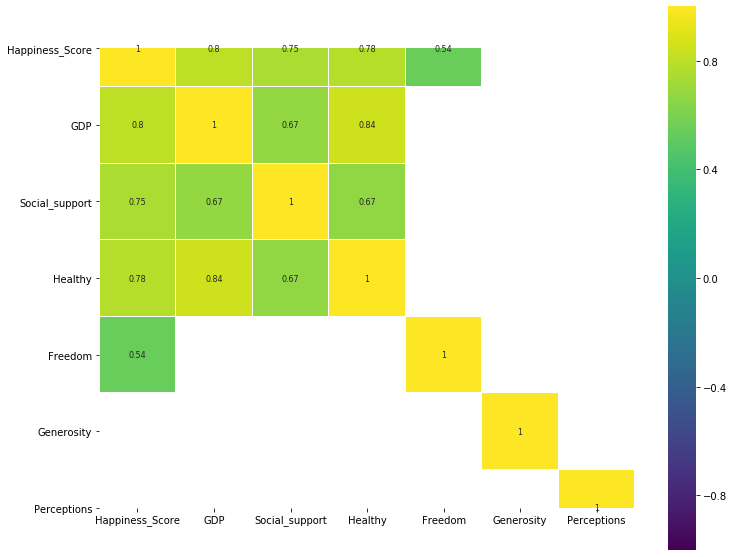

In [0]:
corr = df_num1.drop('Overall_rank', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [0]:
quantitative_features_list = ['Happiness_Score','GDP','Social_support','Healthy','Freedom','Generosity','Perceptions']
df_quantitative_values = df_18[quantitative_features_list]
df_quantitative_values.head()

,Happiness_Score,GDP,Social_support,Healthy,Freedom,Generosity,Perceptions
0,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,7.487,1.420,1.549,0.927,0.660,0.256,0.357


#### Box Plots to show the Happiness Rank region wise

In [0]:
not_num = ['Country','Region']
df_not_num = df_18[not_num]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

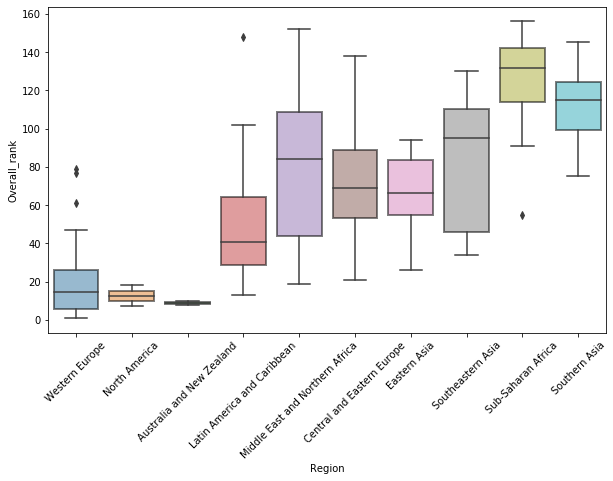

In [0]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Region', y='Overall_rank', data=df_18)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

From the boxplot, we can conclude the following -
1. Australia and New Zealand region has the highest variation in Happiness rank whereas North America has the least variation.
2. Happiness rank is highest in Sub-Saharan Africa and lowest in North America

## Happiness Data Analysis for the year 2019

#### Data Cleaning

In [0]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
Overall_rank       156 non-null int64
Country            156 non-null object
Region             154 non-null object
Happiness_Score    156 non-null float64
GDP                156 non-null float64
Social_support     156 non-null float64
Healthy            156 non-null float64
Freedom            156 non-null float64
Generosity         156 non-null float64
Perceptions        156 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 12.3+ KB


count    156.000000
mean       5.375917
std        1.119506
min        2.905000
25%        4.453750
50%        5.378000
75%        6.168500
max        7.632000
Name: Happiness_Score, dtype: float64


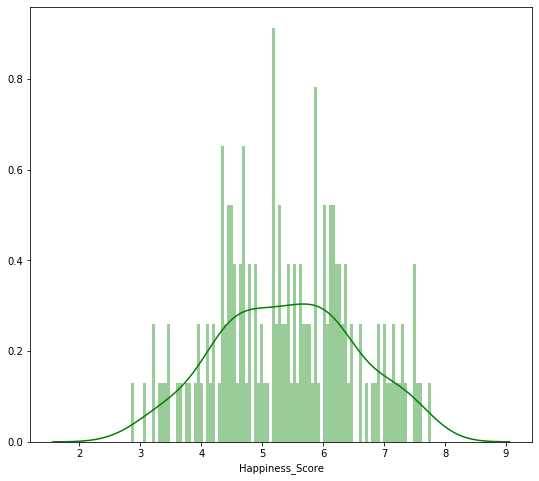

In [0]:
print(df_18['Happiness_Score'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_19['Happiness_Score'], color='g', bins=100, hist_kws={'alpha': 0.4});

Distplot shows that Happiness score is normally distributed for 2019 with a mean score of 5.375 and a standard deviation of 1.12

In [0]:
df_num = df_19.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Overall_rank,Happiness_Score,GDP,Social_support,Healthy,Freedom,Generosity,Perceptions
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


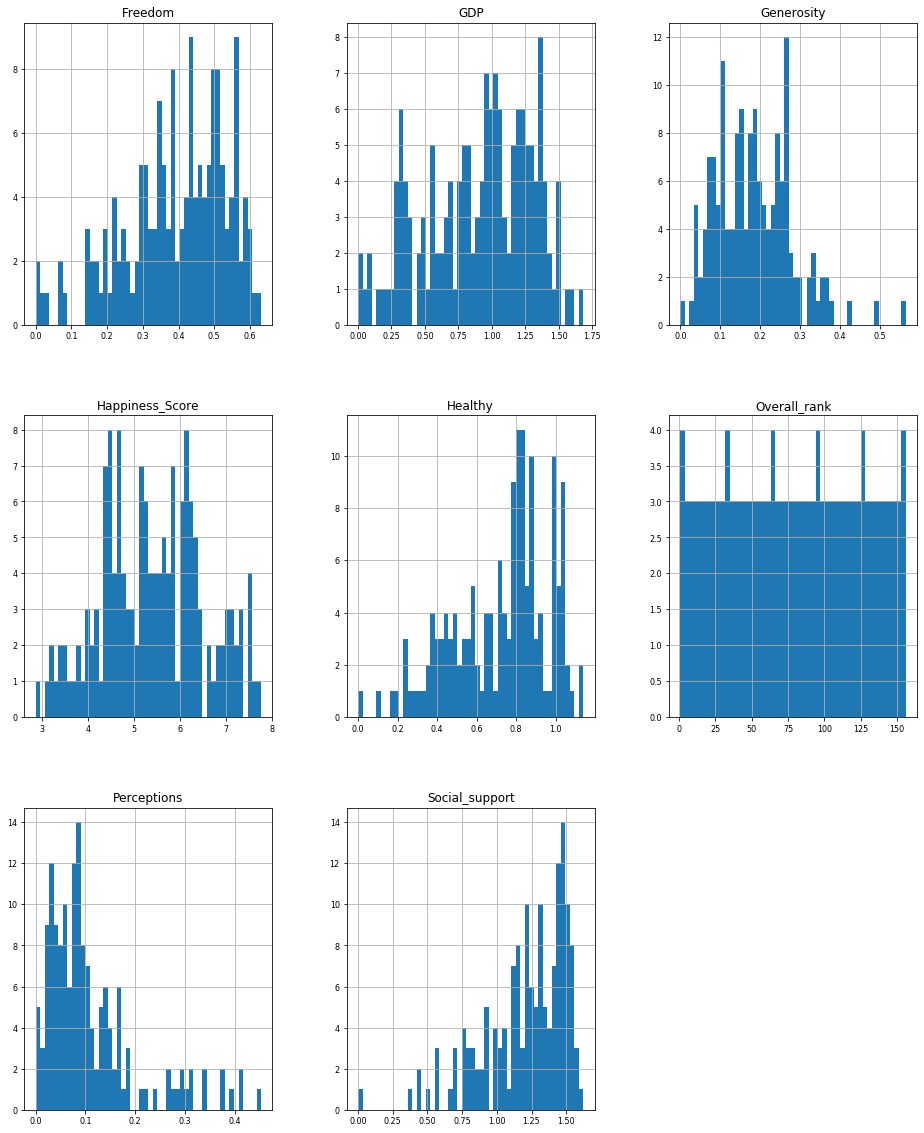

In [0]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

#### Correlation of different attributes with Happiness Rank for year 2019

In [0]:
df_num_corr = df_num.corr()['Overall_rank'][:-1] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Happiness rank:\n{}".format(len(golden_features_list), golden_features_list))

There is 6 strongly correlated values with Happiness rank:
Overall_rank       1.000000
Freedom           -0.546606
Social_support    -0.767465
Healthy           -0.787411
GDP               -0.801947
Happiness_Score   -0.989096
Name: Overall_rank, dtype: float64


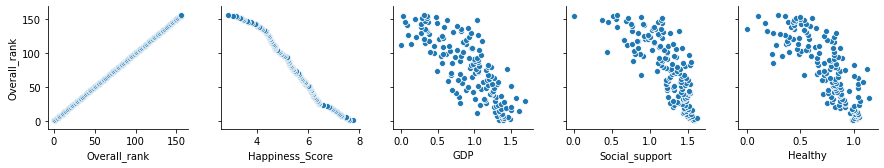

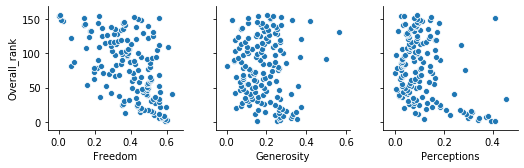

In [0]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Overall_rank'])

From the pairplots, we can conclude that Happiness rank for the year 2019 is strongly correlated with Happiness Score, GDP, Social Support, Health and Freedom. This correlation is also visible in the Heat Map below

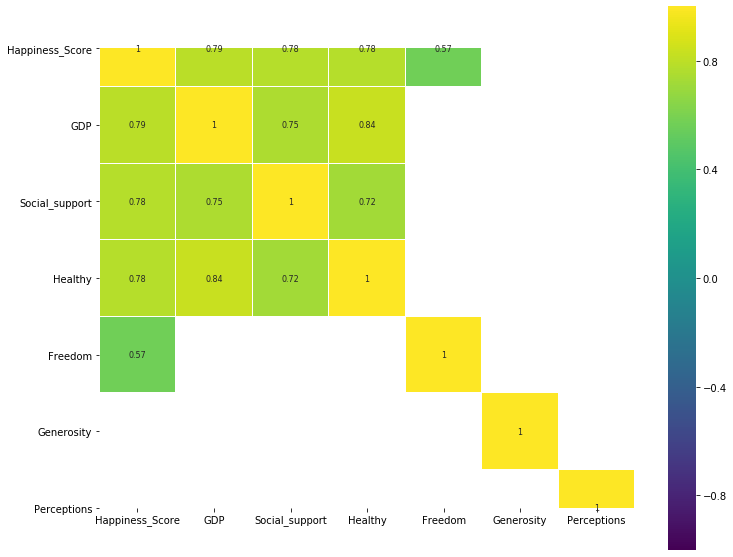

In [0]:
corr = df_num.drop('Overall_rank', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [0]:
quantitative_features_list = ['Happiness_Score','GDP','Social_support','Healthy','Freedom','Generosity','Perceptions']
df_quantitative_values = df_19[quantitative_features_list]
df_quantitative_values.head()

,Happiness_Score,GDP,Social_support,Healthy,Freedom,Generosity,Perceptions
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [0]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('Overall_rank')
features_to_analyse

['Happiness_Score',
 'GDP',
 'Social_support',
 'Healthy',
 'Freedom',
 'Overall_rank']

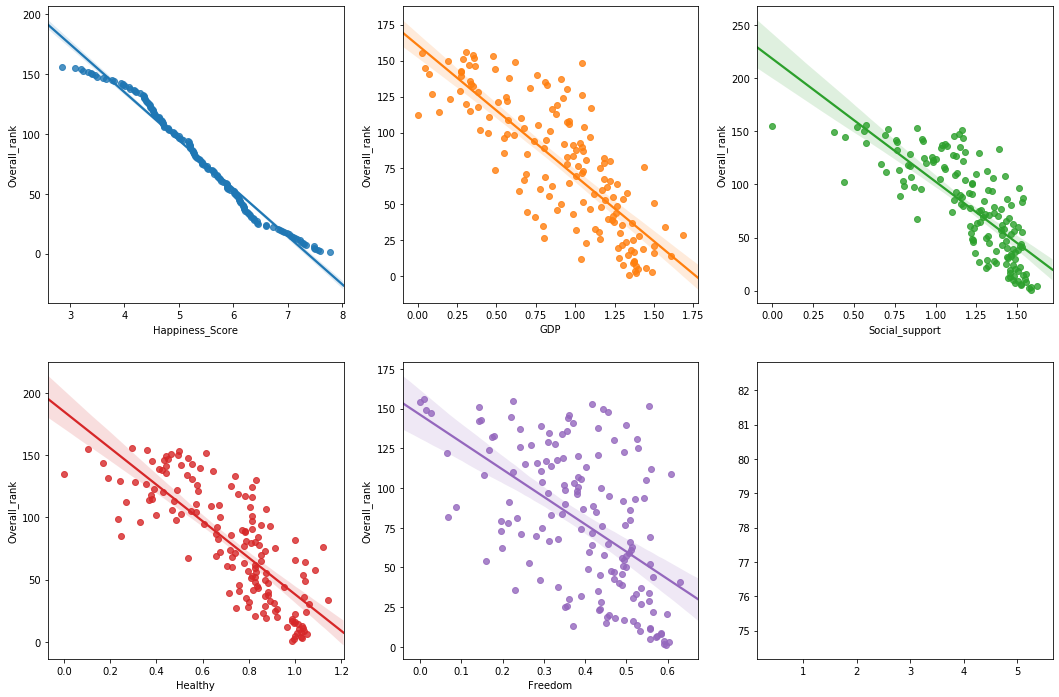

In [0]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='Overall_rank', data=df_19[features_to_analyse], ax=ax)

From the regression plots above, we can conclude that Happiness Rank is linearly correlated with Happiness Score, GDP, Social Support, Healthy and Freedom with some noise. Happiness Rank improves with increase in Happiness Score, Economy, Family, Health and Freedom for year 2019

#### Box plots to show Happiness Rank region wise

In [0]:
not_num = ['Country','Region']
df_not_num = df_19[not_num]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

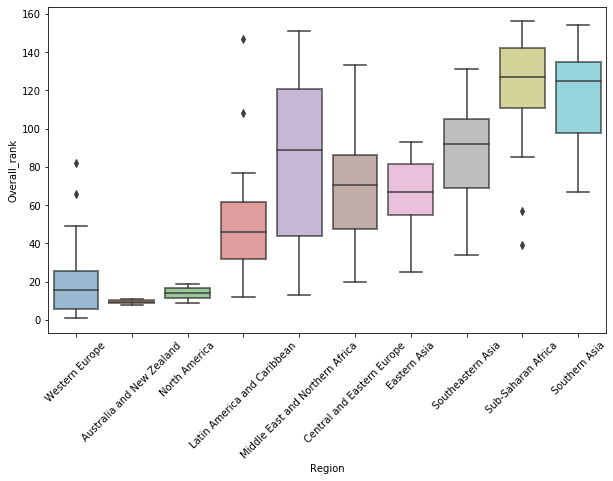

In [0]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Region', y='Overall_rank', data=df_19)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

From the boxplot, we can conclude the following -

1. Latin America and Caribbean region has the highest variation in Happiness rank whereas Australia and New Zealand has the least variation.
2. Happiness rank is highest in Sub-Saharan Africa and lowest in Australia and New Zealand Region